In [1]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3 - STATISTICS
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

# 4 - MACHINE LEARNING

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
import itertools
from xgboost import XGBRegressor

## 4.1 - Preprocessing

### 4.1.1 - Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

### 4.1.2 - Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

### 4.1.3 - Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, ElasticNet

### 4.1.4 - Evaluation
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics  import ConfusionMatrixDisplay

# 5 - DEEP LEARNING
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

2023-11-20 14:45:19.730283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 14:45:19.888933: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-20 14:45:19.888954: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-20 14:45:19.916249: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 14:45:20.847358: W tensorflow/stream_executor/platform/de

In [2]:
df_males = pd.read_csv('../data_csv/data_model_males.csv')
df_females = pd.read_csv('../data_csv/data_model_females.csv')

In [3]:
df_males.head()

,Name,Exercise,Metric,Height,Weight,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
0,Robert,Chest,Chest_Weight,185,80,35.0,35.0,36.0,36.0,36.0,...,78.0,79.0,80.0,80.0,80.0,81.0,81.0,81.0,81.0,82.0
1,Robert,Chest,Chest_Repetitions,185,80,8.0,10.0,8.0,10.0,12.0,...,8.0,8.0,8.0,10.0,12.0,8.0,10.0,12.0,14.0,8.0
2,Robert,Shoulders,Shoulders_Weight,185,80,7.0,7.0,7.0,7.0,7.0,...,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5
3,Robert,Shoulders,Shoulders_Repetitions,185,80,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
4,Robert,Legs,Legs_Weight,185,80,60.0,60.0,60.0,62.0,62.0,...,116.0,117.0,117.0,117.0,118.0,118.0,119.0,119.0,119.0,119.0


In [4]:
df_females.head()

,Name,Exercise,Metric,Height,Weight,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
0,Julia,Chest,Chest_Weight,160,52,21.0,21.5,22.0,22.5,22.5,...,47.5,48.5,48.5,48.5,49.0,49.5,49.5,49.5,50.0,50.5
1,Julia,Chest,Chest_Repetitions,160,52,8.0,8.0,8.0,8.0,10.0,...,8.0,8.0,10.0,12.0,8.0,8.0,10.0,12.0,8.0,8.0
2,Julia,Shoulders,Shoulders_Weight,160,52,4.0,4.0,4.0,4.0,4.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,Julia,Shoulders,Shoulders_Repetitions,160,52,8.0,9.0,10.0,11.0,12.0,...,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,15.0,15.0
4,Julia,Legs,Legs_Weight,160,52,30.5,30.5,31.0,31.5,31.5,...,66.5,67.0,68.0,68.5,69.0,69.0,69.5,69.5,70.0,70.5


In [5]:
df_males.describe()

,Height,Weight,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,176.250000,71.750000,18.37500,19.031250,19.250000,19.750000,20.187500,20.390625,20.421875,20.953125,...,38.671875,38.953125,38.953125,39.093750,39.562500,39.921875,40.031250,39.968750,40.359375,40.500000
std,6.753733,11.878416,17.12525,17.001868,17.305602,17.454087,17.620438,17.946486,18.408058,18.242258,...,40.146026,40.430418,40.686718,41.028007,41.046541,41.199184,41.528447,41.851107,42.007533,42.227113
min,168.000000,55.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
25%,171.000000,64.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.750000,...,9.000000,8.750000,9.000000,8.750000,9.750000,9.000000,9.000000,9.875000,9.875000,9.875000
50%,176.000000,73.500000,8.00000,10.000000,10.000000,11.000000,12.000000,12.500000,11.000000,11.000000,...,13.000000,13.000000,12.250000,11.500000,12.250000,13.250000,12.250000,12.250000,13.250000,13.250000
75%,181.250000,81.250000,20.25000,21.000000,21.250000,21.250000,22.000000,22.000000,22.250000,22.750000,...,68.750000,69.750000,69.750000,70.500000,70.750000,71.000000,71.000000,72.000000,72.250000,72.500000
max,185.000000,85.000000,62.00000,63.000000,64.000000,65.000000,65.000000,66.000000,68.000000,68.000000,...,134.000000,135.000000,135.000000,136.000000,137.000000,137.000000,137.000000,139.000000,139.000000,140.000000


In [6]:
df_m = df_males.drop(columns = ['Name'])
df_f = df_females.drop(columns = ['Name'])

In [7]:
m_chest = df_m[df_m['Exercise'] == 'Chest']
f_chest = df_f[df_f['Exercise'] == 'Chest']
m_shoulders = df_m[df_m['Exercise'] == 'Shoulders']
f_shoulders = df_f[df_f['Exercise'] == 'Shoulders']
m_legs = df_m[df_m['Exercise'] == 'Legs']
f_legs = df_f[df_f['Exercise'] == 'Legs']
m_back = df_m[df_m['Exercise'] == 'Back']
f_back = df_f[df_f['Exercise'] == 'Back']

In [8]:
m_chest = m_chest.drop(columns=['Exercise'])
f_chest = f_chest.drop(columns=['Exercise'])
m_shoulders = m_shoulders.drop(columns=['Exercise'])
f_shoulders = f_shoulders.drop(columns=['Exercise'])
m_legs = m_legs.drop(columns=['Exercise'])
f_legs = f_legs.drop(columns=['Exercise'])
m_back = m_back.drop(columns=['Exercise'])
f_back = f_back.drop(columns=['Exercise'])

In [9]:
dfs = [m_chest, f_chest, m_shoulders, f_shoulders, m_legs, f_legs, m_back, f_back]
for df in dfs:
    for row  in df['Metric']:
        words_metric = row.split('_')
    df['Metric'] = df['Metric'].map({f'{words_metric[0]}_Weight': 0, f'{words_metric[0]}_Repetitions': 1})

In [10]:
o_dfs = [df_m, df_f]
for df in o_dfs:
    df['Metric'] = df['Metric'].apply(lambda row: 0 if row.split('_')[1] == 'Weight' else 1)
    df['Exercise'] = df['Exercise'].map({'Chest': 0, 'Shoulders': 1, 'Legs': 2, 'Back': 3})

In [11]:
x = df_m.drop(columns = ['99'])
y = df_m['99']
x

,Exercise,Metric,Height,Weight,0,1,2,3,4,5,...,89,90,91,92,93,94,95,96,97,98
0,0,0,185,80,35.0,35.0,36.0,36.0,36.0,37.0,...,77.0,78.0,79.0,80.0,80.0,80.0,81.0,81.0,81.0,81.0
1,0,1,185,80,8.0,10.0,8.0,10.0,12.0,8.0,...,12.0,8.0,8.0,8.0,10.0,12.0,8.0,10.0,12.0,14.0
2,1,0,185,80,7.0,7.0,7.0,7.0,7.0,7.0,...,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5
3,1,1,185,80,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
4,2,0,185,80,60.0,60.0,60.0,62.0,62.0,63.0,...,116.0,116.0,117.0,117.0,117.0,118.0,118.0,119.0,119.0,119.0
5,2,1,185,80,8.0,9.0,10.0,8.0,9.0,8.0,...,8.0,9.0,8.0,9.0,10.0,8.0,9.0,8.0,9.0,10.0
6,3,0,185,80,20.0,20.0,21.0,21.0,21.0,21.0,...,71.0,74.0,75.0,75.0,75.0,76.0,77.0,77.0,78.0,79.0
7,3,1,185,80,8.0,9.0,8.0,9.0,10.0,11.0,...,8.0,8.0,8.0,9.0,10.0,8.0,8.0,9.0,8.0,8.0
8,0,0,168,55,21.0,21.0,22.0,22.0,22.0,22.0,...,61.0,61.0,63.0,63.0,64.0,65.0,65.0,65.0,65.0,65.0
9,0,1,168,55,8.0,10.0,8.0,10.0,12.0,14.0,...,12.0,14.0,8.0,10.0,8.0,8.0,10.0,12.0,14.0,16.0


In [12]:
sts = StandardScaler()

In [13]:
sts.fit(x)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


StandardScaler()

In [14]:
preprocessed_df_m = sts.transform(x)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [15]:
preprocessed_df_m = pd.DataFrame(preprocessed_df_m, columns = x.columns)

In [16]:
preprocessed_df_m

,Exercise,Metric,Height,Weight,0,1,2,3,4,5,...,89,90,91,92,93,94,95,96,97,98
0,-1.341641,-1.0,1.316310,0.705650,0.986322,0.954264,0.983382,0.945911,0.911755,0.940303,...,0.984544,0.995302,1.006363,1.024995,1.012986,1.000926,1.013016,1.002308,0.996098,0.982941
1,-1.341641,1.0,1.316310,0.705650,-0.615524,-0.539691,-0.660480,-0.567547,-0.472094,-0.701468,...,-0.670285,-0.776233,-0.777840,-0.772940,-0.720466,-0.682238,-0.787216,-0.734720,-0.678985,-0.637532
2,-0.447214,-1.0,1.316310,0.705650,-0.674852,-0.718966,-0.719190,-0.742176,-0.760396,-0.758081,...,-0.708474,-0.712964,-0.715016,-0.710512,-0.708084,-0.719367,-0.725564,-0.722487,-0.715400,-0.722184
3,-0.447214,1.0,1.316310,0.705650,-0.615524,-0.659208,-0.660480,-0.683967,-0.702736,-0.701468,...,-0.772121,-0.776233,-0.777840,-0.772940,-0.769993,-0.781248,-0.787216,-0.783650,-0.776091,-0.782649
4,0.447214,-1.0,1.316310,0.705650,2.469514,2.448219,2.392407,2.459369,2.410924,2.412236,...,1.977442,1.956992,1.961288,1.948933,1.929239,1.941518,1.925462,1.931985,1.918607,1.902015
5,0.447214,1.0,1.316310,0.705650,-0.615524,-0.599449,-0.543062,-0.683967,-0.645075,-0.701468,...,-0.772121,-0.750925,-0.777840,-0.747969,-0.720466,-0.781248,-0.762555,-0.783650,-0.751815,-0.734277
6,1.341641,-1.0,1.316310,0.705650,0.096407,0.057891,0.102741,0.072762,0.046849,0.034498,...,0.831790,0.894071,0.905844,0.900138,0.889168,0.901916,0.914373,0.904447,0.923268,0.934568
7,1.341641,1.0,1.316310,0.705650,-0.615524,-0.599449,-0.660480,-0.625757,-0.587415,-0.531630,...,-0.772121,-0.776233,-0.777840,-0.747969,-0.720466,-0.781248,-0.787216,-0.759185,-0.776091,-0.782649
8,-1.341641,-1.0,-1.241093,-1.432684,0.155735,0.117649,0.161451,0.130972,0.104509,0.091111,...,0.577201,0.565072,0.604289,0.600482,0.616768,0.629640,0.618444,0.610865,0.607673,0.595962
9,-1.341641,1.0,-1.241093,-1.432684,-0.615524,-0.539691,-0.660480,-0.567547,-0.472094,-0.361791,...,-0.670285,-0.624387,-0.777840,-0.722998,-0.769993,-0.781248,-0.737895,-0.685790,-0.630432,-0.589160


In [17]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_df_m, y, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test)

In [18]:
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:364: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [19]:
yhat = xgbr.predict(x_test)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


In [20]:
y_test

27    15.0
14    50.0
3      8.0
1      8.0
9      8.0
19     8.0
15    14.0
Name: 99, dtype: float64

In [21]:
pd.DataFrame(yhat)

,0
0,19.213097
1,60.225426
2,9.503065
3,13.681461
4,11.904269
5,9.959797
6,18.712372


In [22]:
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Absolute Error: 4.599926676068987
Mean Squared Error: 28.305470308826962
R-squared: 0.860156478611361


/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated 

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}
xgb_model = XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_result = grid_search.fit(x_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.8}
Best Score:  -71.2991569176357

In [38]:
best_params = grid_result.best_params_

In [39]:
grid_result.predict(x_test)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


array([18.10249  , 60.137985 ,  9.026842 , 13.709075 , 12.7583885,
       11.964672 , 17.993212 ], dtype=float32)

In [41]:
y_test

27    15.0
14    50.0
3      8.0
1      8.0
9      8.0
19     8.0
15    14.0
Name: 99, dtype: float64

In [23]:
x_c = m_chest.drop(columns = ['99'])
y_c = m_chest['99']
sts.fit(x_c)
m_c_p = sts.transform(x_c)
m_c_p = pd.DataFrame(m_c_p, columns = x_c.columns)
m_c_p

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validatio

,Metric,Height,Weight,0,1,2,3,4,5,6,...,89,90,91,92,93,94,95,96,97,98
0,-1.0,1.316310,0.705650,0.622662,0.588801,0.621841,0.589152,0.548821,0.579865,0.578049,...,0.795977,0.812254,0.822719,0.833685,0.817099,0.808491,0.822502,0.804579,0.798783,0.787973
1,1.0,1.316310,0.705650,-0.871727,-0.829996,-0.875926,-0.835773,-0.768350,-0.984421,-0.794023,...,-0.928640,-1.007194,-0.974605,-0.999149,-0.936063,-0.923080,-1.010861,-0.946382,-0.944017,-0.915065
2,-1.0,-1.241093,-1.432684,-0.152206,-0.205726,-0.127043,-0.178116,-0.219529,-0.229249,-0.133396,...,0.371456,0.370388,0.417688,0.400932,0.416376,0.426527,0.420669,0.409996,0.394656,0.381277
3,1.0,-1.241093,-1.432684,-0.871727,-0.829996,-0.875926,-0.835773,-0.768350,-0.660776,-0.895658,...,-0.928640,-0.851242,-0.974605,-0.948237,-0.986153,-1.024937,-0.960632,-0.897059,-0.893501,-0.864228
4,-1.0,0.564133,1.133317,1.508226,1.496830,1.477707,1.466029,1.536700,1.550801,1.543581,...,1.485824,1.488049,1.455580,1.444630,1.468273,1.470562,1.475480,1.495099,1.506006,1.525109
5,1.0,0.564133,1.133317,-0.871727,-0.829996,-0.875926,-0.835773,-0.987878,-0.984421,-0.895658,...,-0.928640,-1.007194,-0.923977,-0.897325,-0.986153,-0.974009,-1.010861,-0.995705,-0.994532,-1.067576
6,-1.0,-0.639351,-0.406284,1.508226,1.553582,1.531199,1.575638,1.536700,1.496860,1.492763,...,1.167433,1.150151,1.151806,1.164613,1.142686,1.139527,1.123876,1.125177,1.127137,1.118413
7,1.0,-0.639351,-0.406284,-0.871727,-0.943500,-0.875926,-0.945383,-0.878114,-0.768658,-0.895658,...,-1.034770,-0.955210,-0.974605,-0.999149,-0.936063,-0.923080,-0.860173,-0.995705,-0.994532,-0.965902


In [24]:
x_c_train, x_c_test, y_c_train, y_c_test = train_test_split(m_c_p, y_c, test_size=0.2)

In [25]:
xr = XGBRegressor()
xr.fit(x_c_train, y_c_train)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:364: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [26]:
y_c_hat = xr.predict(x_c_test)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


In [27]:
pd.DataFrame(y_c_hat)

,0
0,93.995789
1,13.035494


In [28]:
y_c_test

16    110.0
17     10.0
Name: 99, dtype: float64

In [29]:
model = Sequential()
model.add(Dense(128, input_dim = preprocessed_df_m.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

2023-11-20 14:45:23.022898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-20 14:45:23.022962: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-20 14:45:23.022986: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ClementPC): /proc/driver/nvidia/version does not exist
2023-11-20 14:45:23.023301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.compile(optimizer= 'adam', loss = 'mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               13312     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 24,193
Trainable params: 24,193
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(x_train, y_train, batch_size = 32, validation_data=(x_test,y_test), epochs=500, verbose=0)

In [33]:
train_mse = model.evaluate(x_train, y_train, verbose = 0)
test_mse = model.evaluate(x_test, y_test, verbose = 0)
print(f'Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.621, Test: 42.520


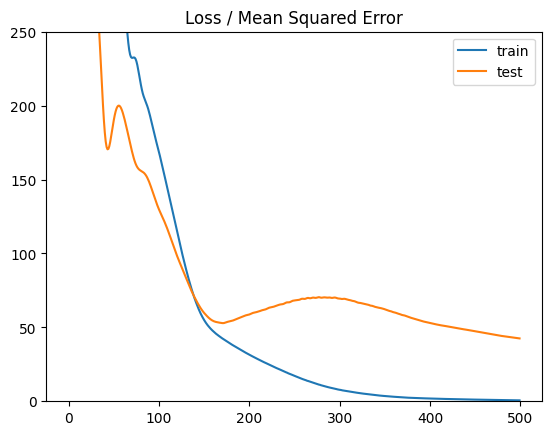

In [34]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylim(0, 250)
plt.legend()
plt.show()

In [35]:
min(history.history['loss'])

0.6292679309844971

In [36]:
min(history.history['val_loss'])

42.519630432128906